In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

Plot the mass of salt aerosol contained in each size bin in units of micrograms per cubic meter

C = number concentration (#/m**3)
R = radius (microns)
rho = density of NaCl (g/cm**3)

output for each bin is MC (mass concentration) in micrograms per cubic meter

MC = rho*C*(4/3)pi(R**3)
^all units converted to micrograms and meters

In [2]:
# Computing MC

def mass_conc(C, R, rho):
    R = R*10**(-6)     # convert from microns to meters
    rho = rho*10**12    # convert from g/cm**3 to microgram/m**3
    MC = rho*C*(4/3)*np.pi*(R**3)
    return MC

In [3]:
#importing the data

directory = os.fsencode('spicule_histograms')

histnames = []
histdict = {}

rho = 2.16  # g/cm**3

for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if (filename.endswith(".csv") and not "metadata" in filename):
        histnames.append(filename[:-4])
        path = "spicule_histograms/" + str(filename)
        #plot the histogram
        Hist = pd.read_csv(path, sep=',')
        Hist = Hist.rename(columns={'Lower limit (um)':'Lower', 'Mid point (um)':'Mid','Upper limit (um)':'Upper', 'Good=1 Bad=0 flag':'Flag','Concentration (#/m**3)':'Concentration'})
        Hist['Mass'] = mass_conc(Hist['Concentration'], Hist['Mid'], rho)
        histdict[filename[:-4]] = Hist

#print(histdict['sli_histo_210525a1'].head())

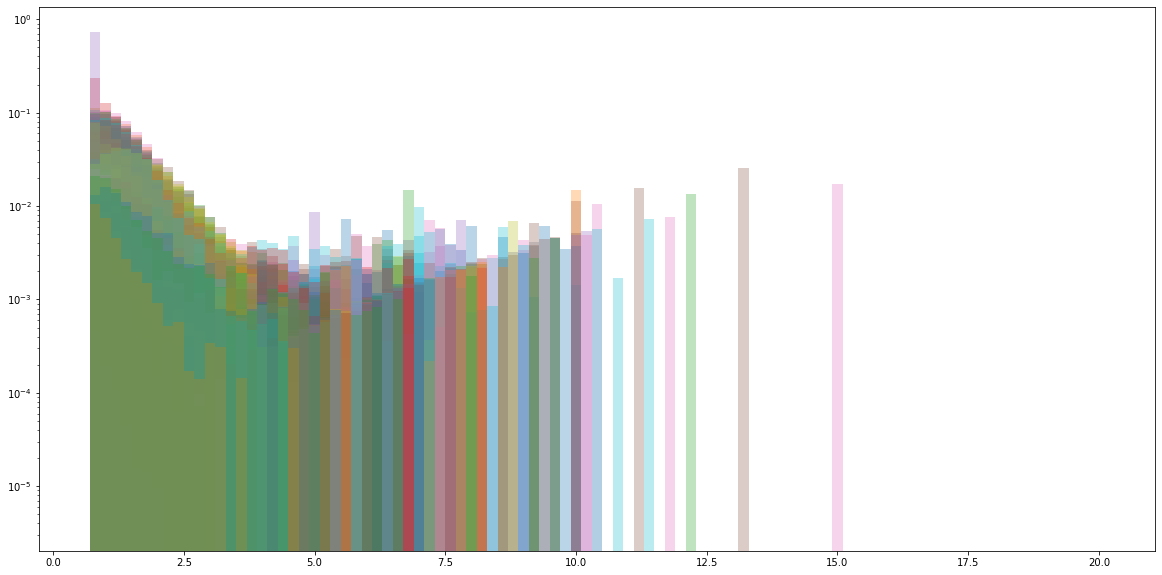

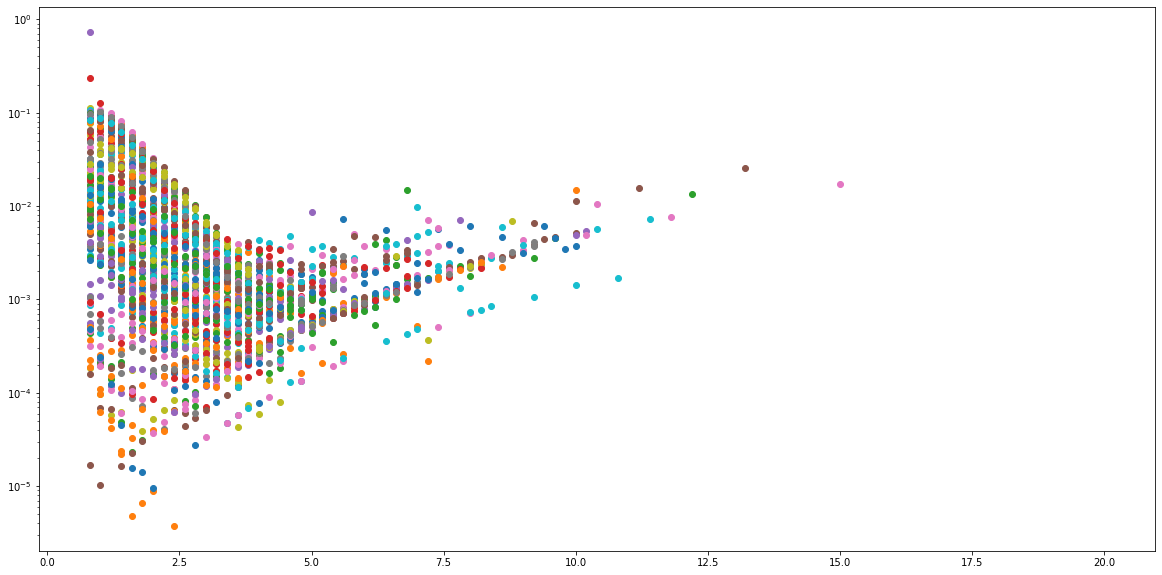

In [8]:
# plotting
# plot all histograms on one plot, with a log-log axis

fig = plt.figure(figsize=(20, 10))
plt.yscale('log')
#plt.xscale('log')

for df in histdict.values():
    plt.bar(df['Mid'], df['Mass'], width=0.2, alpha=0.3)
    
plt.show()


fig3 = plt.figure(figsize=(20, 10))
plt.yscale('log')
#plt.xscale('log')

for df in histdict.values():
    plt.plot(df['Mid'], df['Mass'], 'o')
    
plt.show()

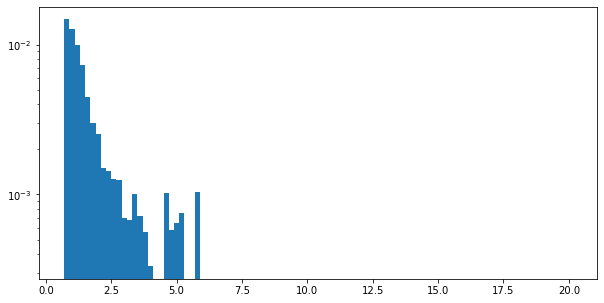

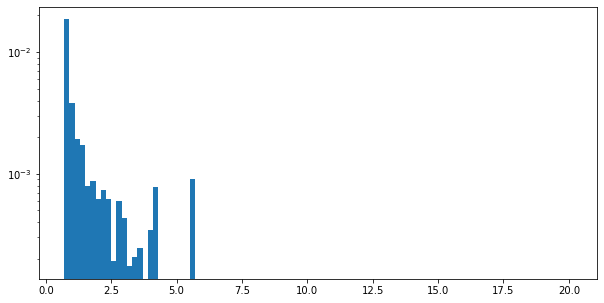

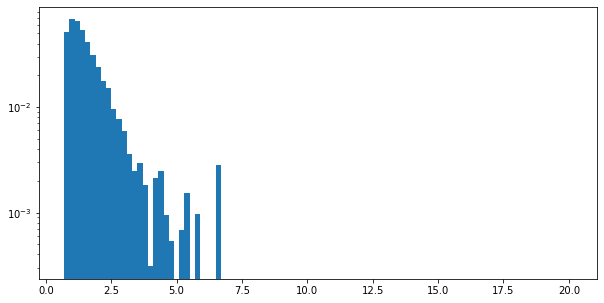

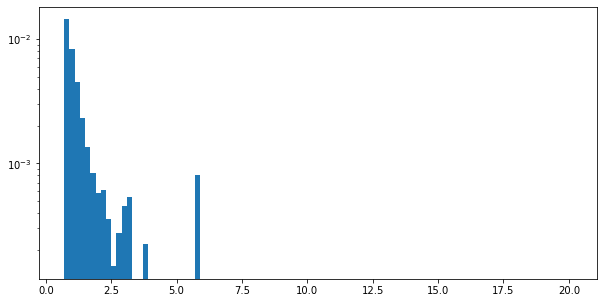

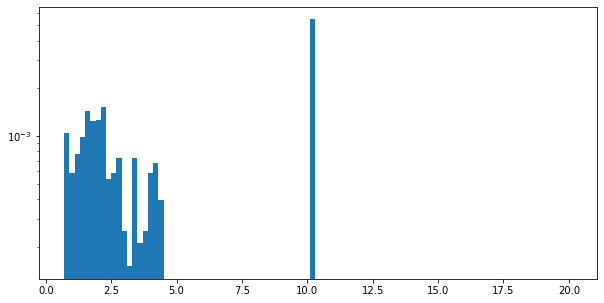

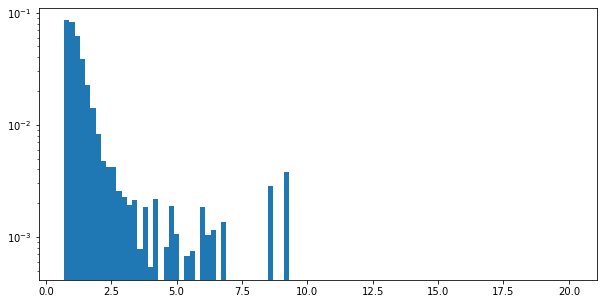

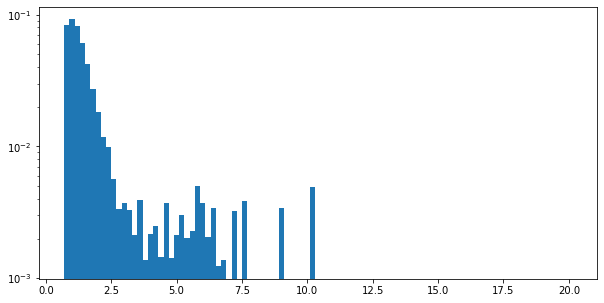

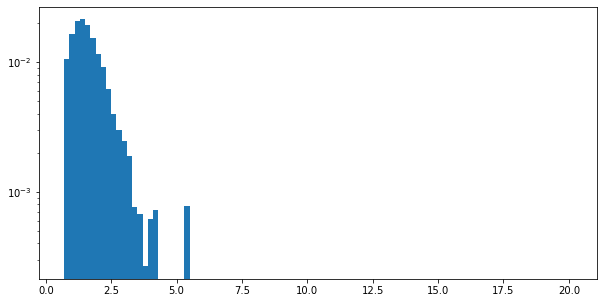

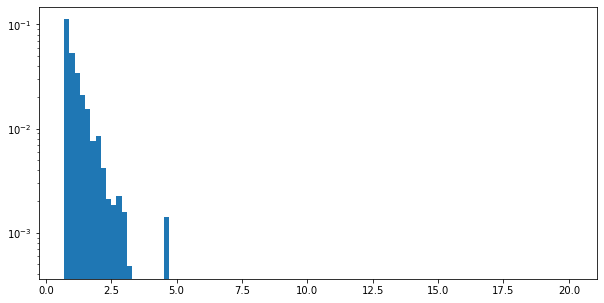

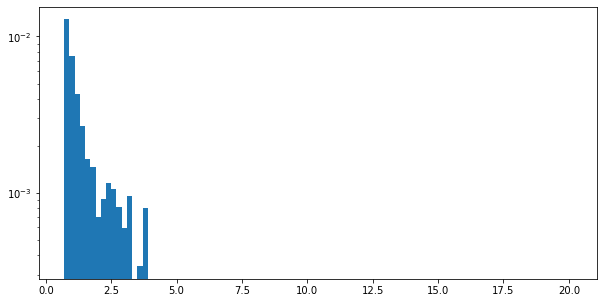

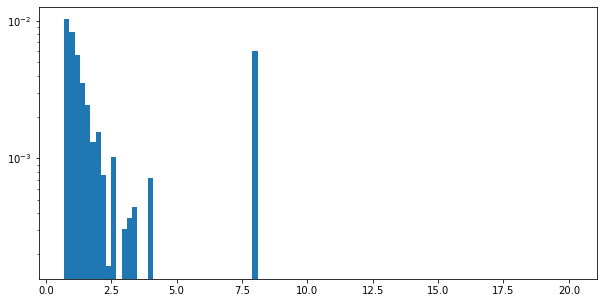

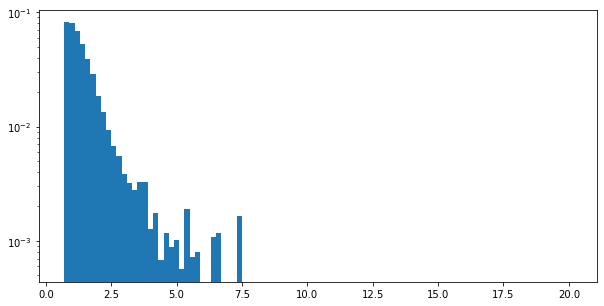

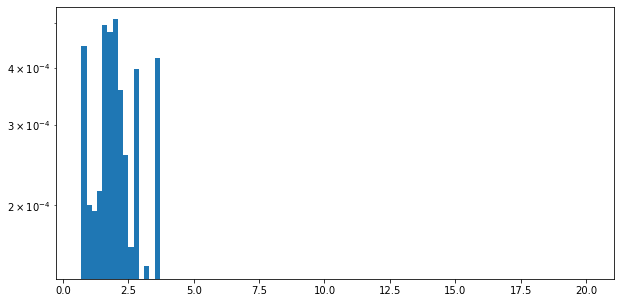

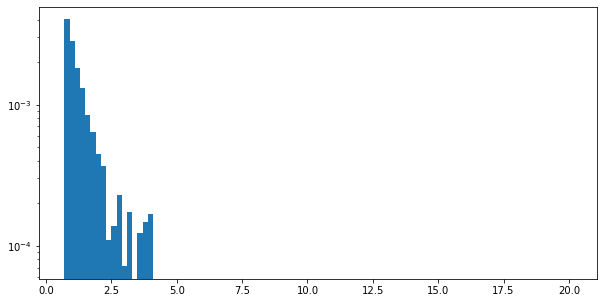

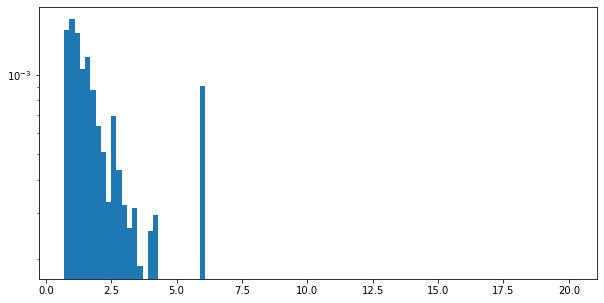

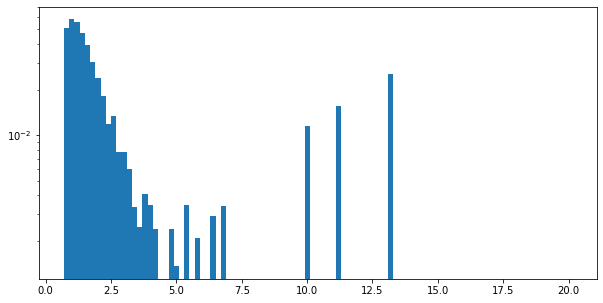

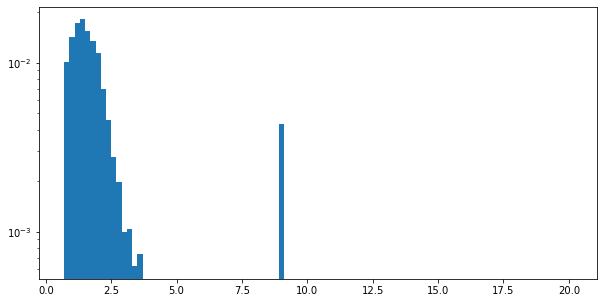

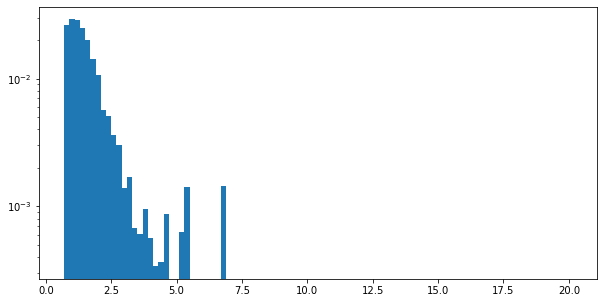

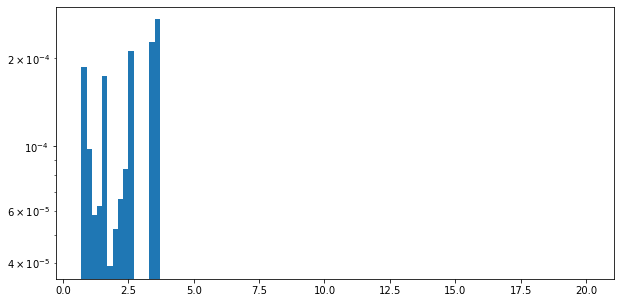

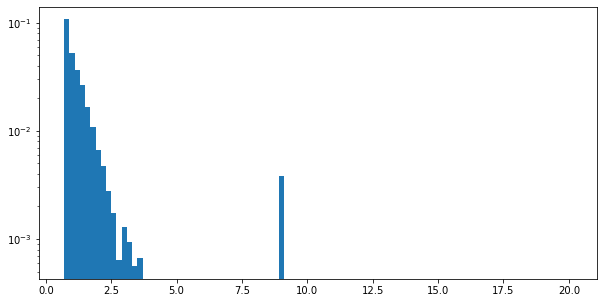

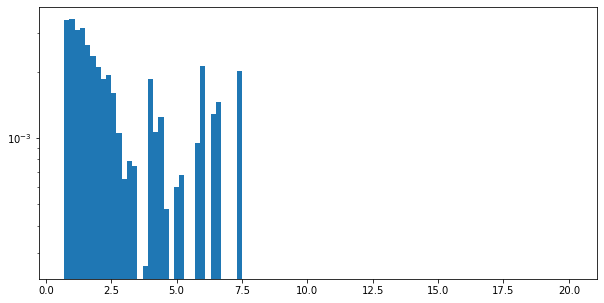

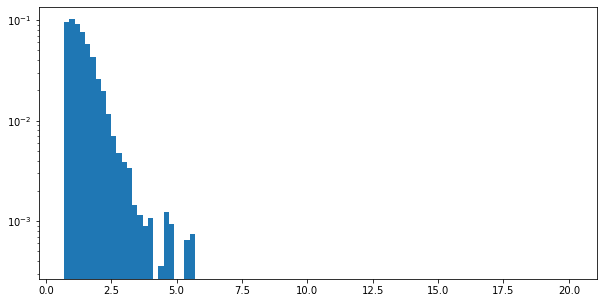

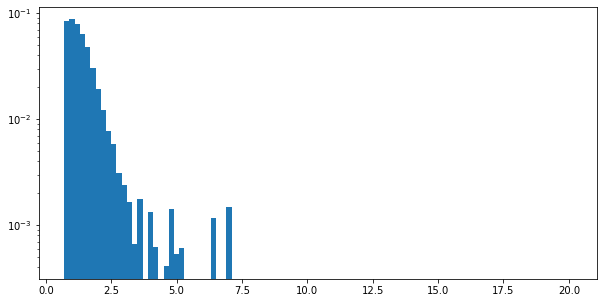

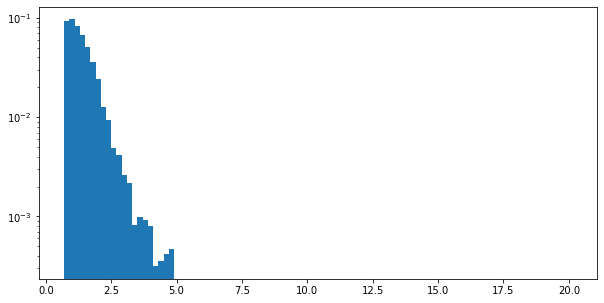

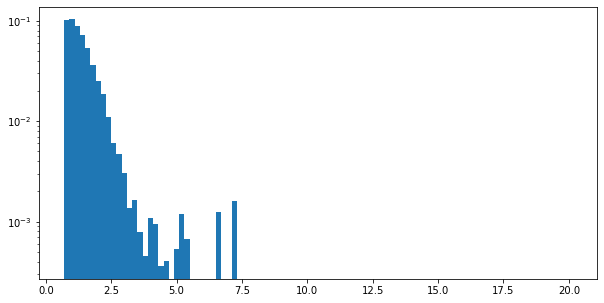

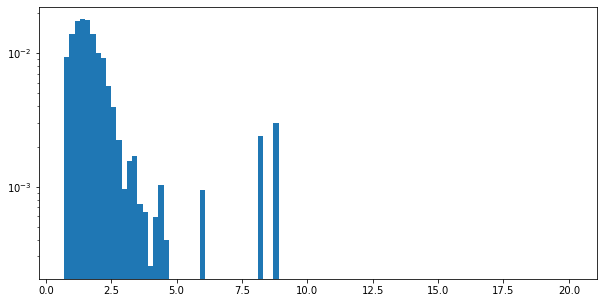

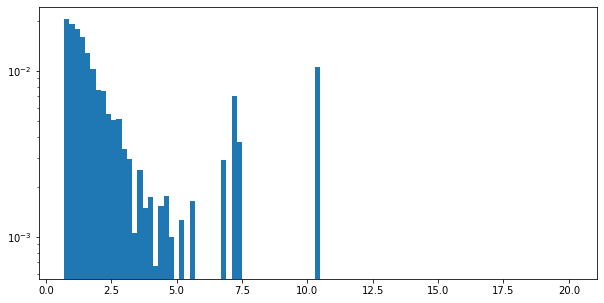

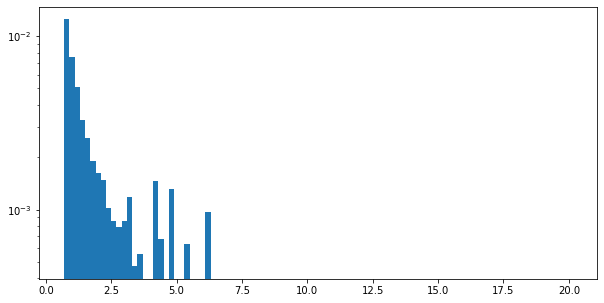

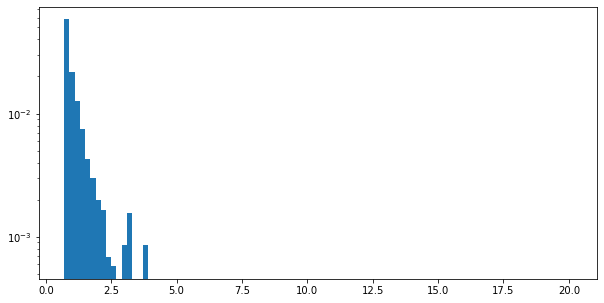

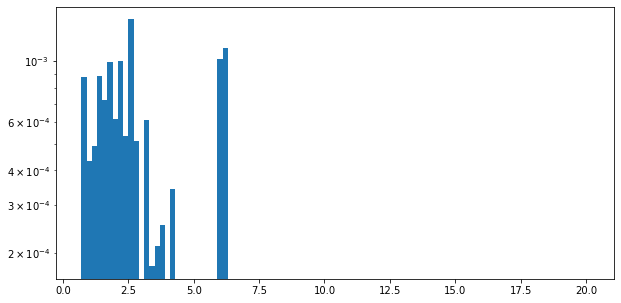

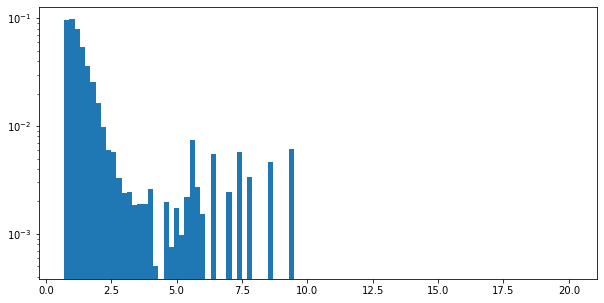

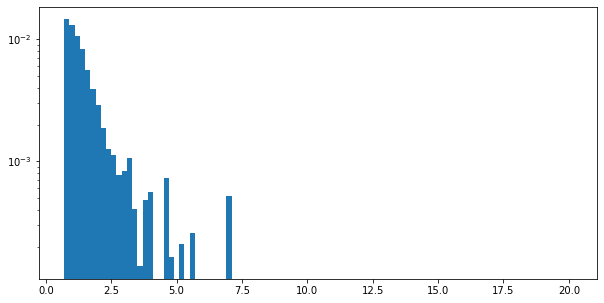

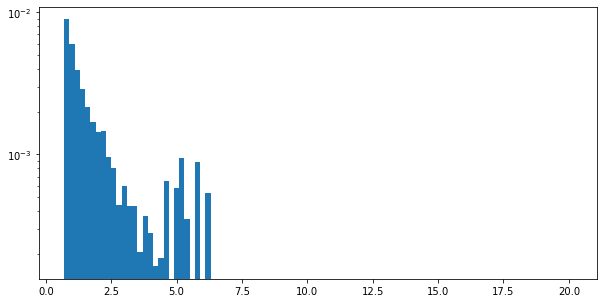

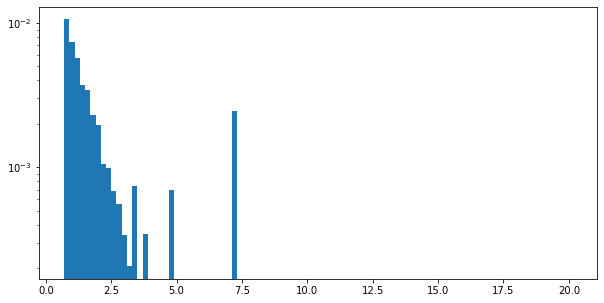

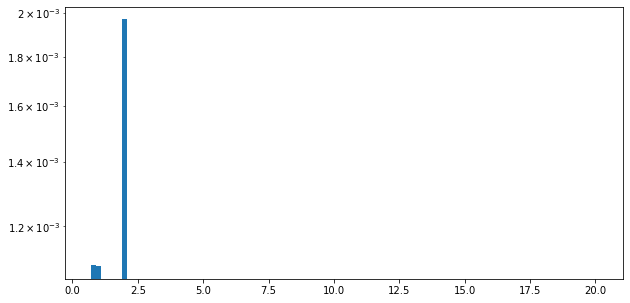

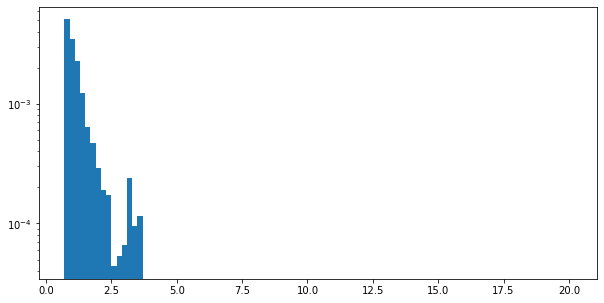

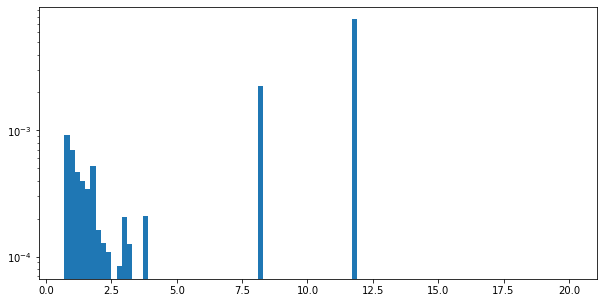

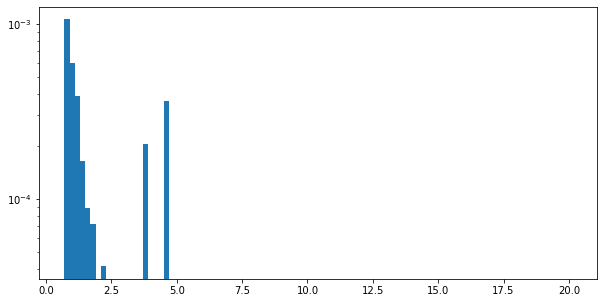

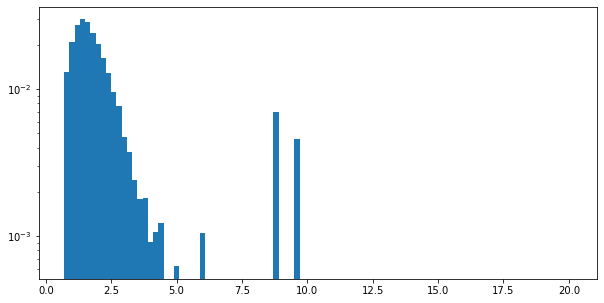

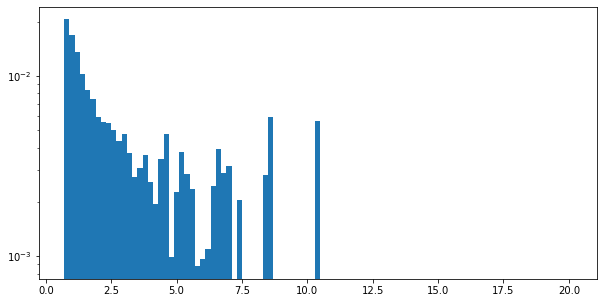

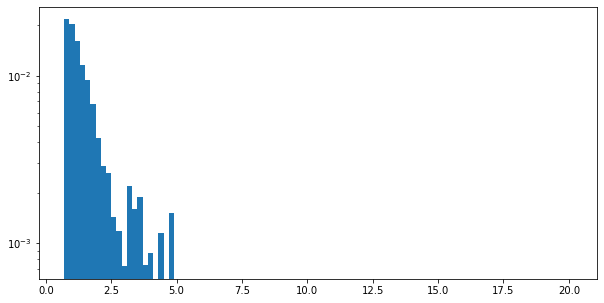

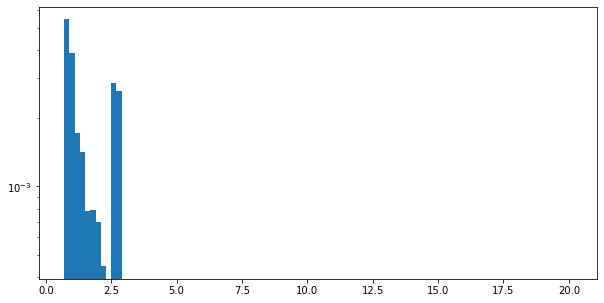

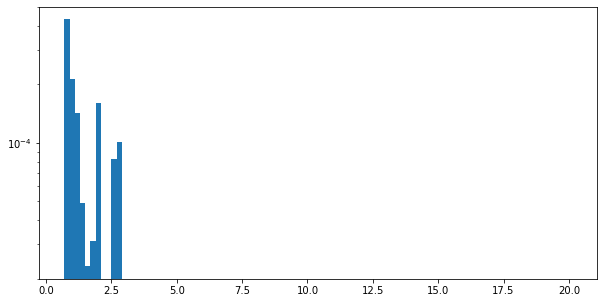

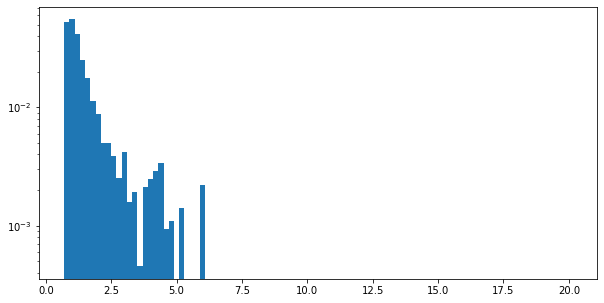

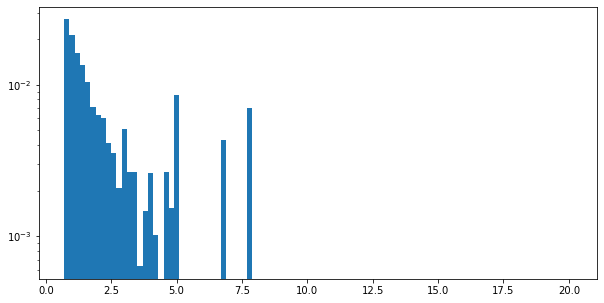

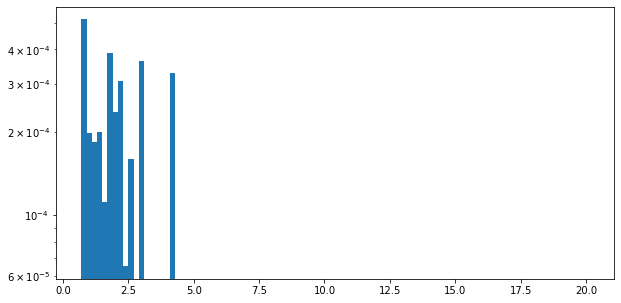

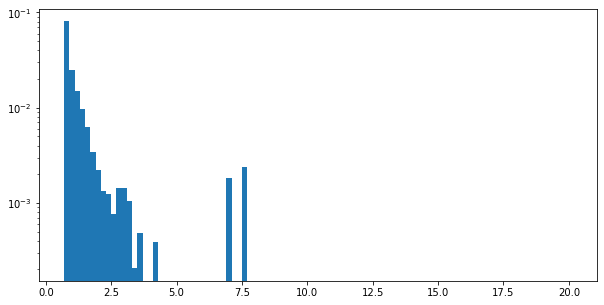

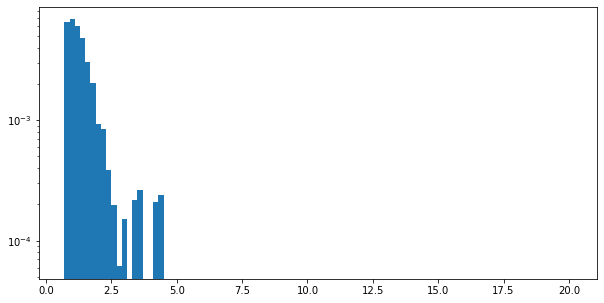

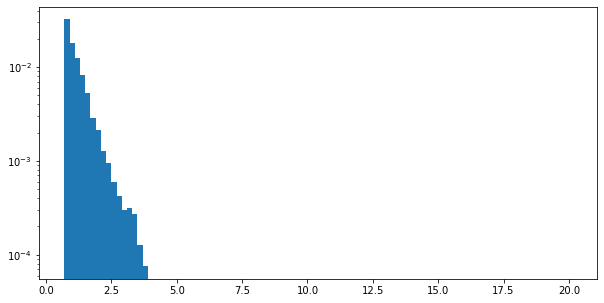

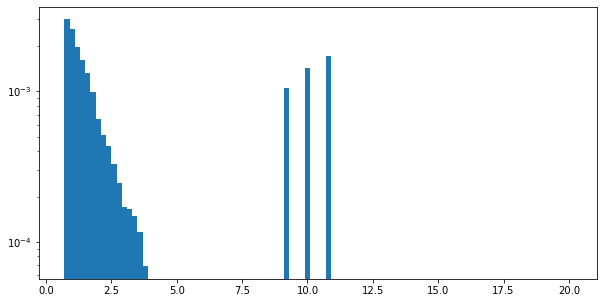

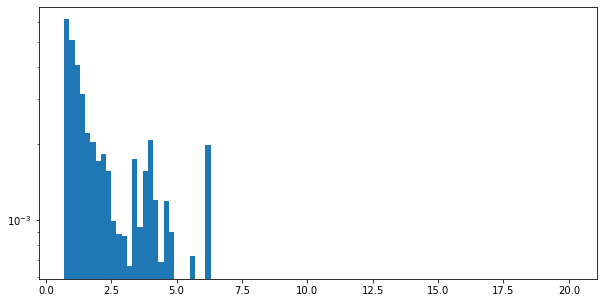

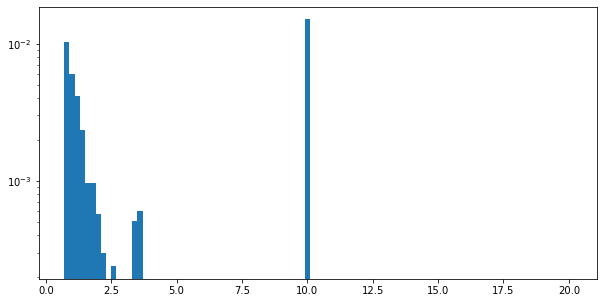

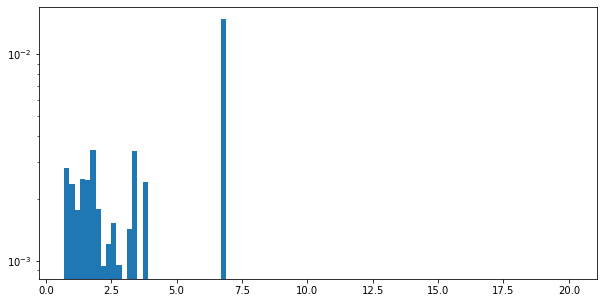

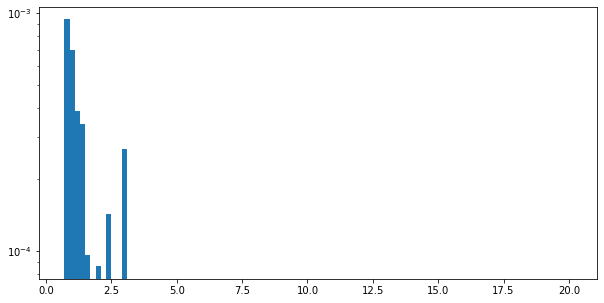

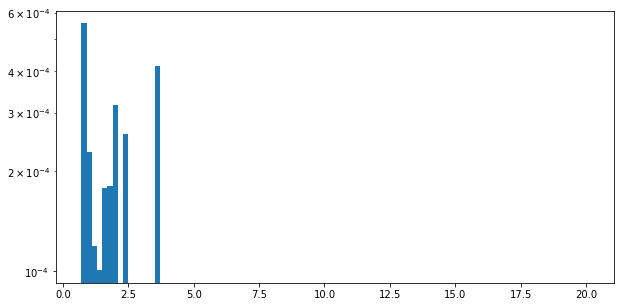

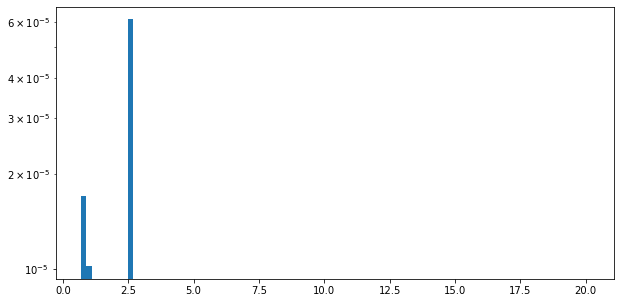

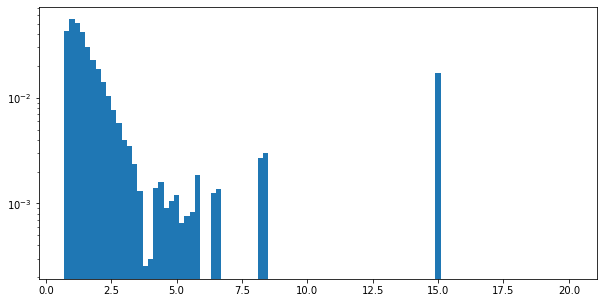

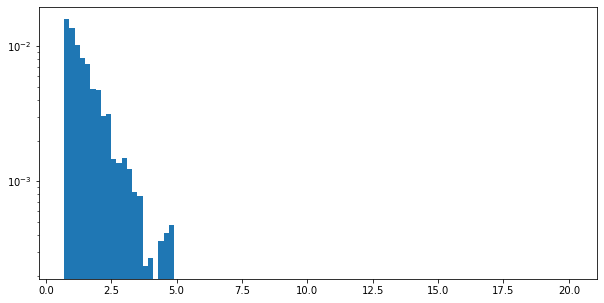

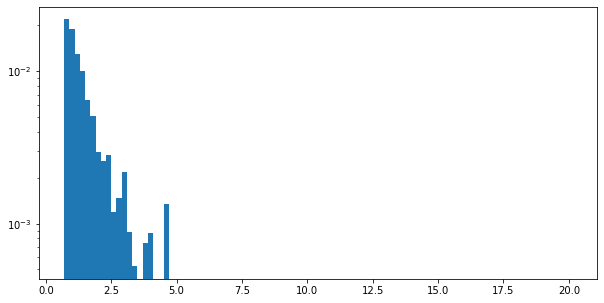

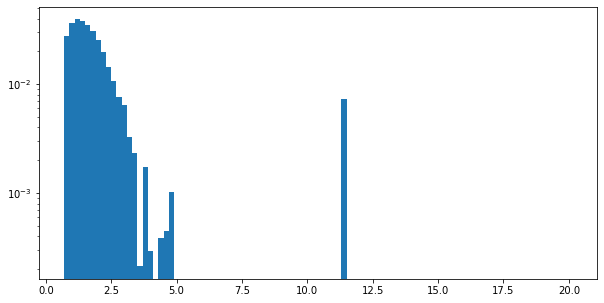

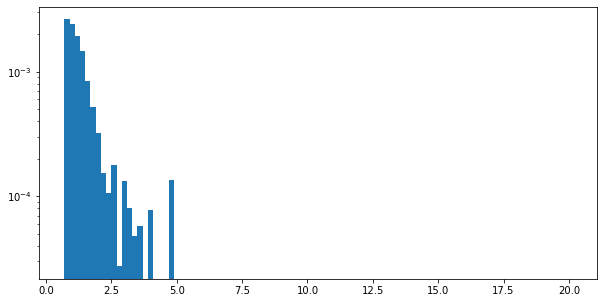

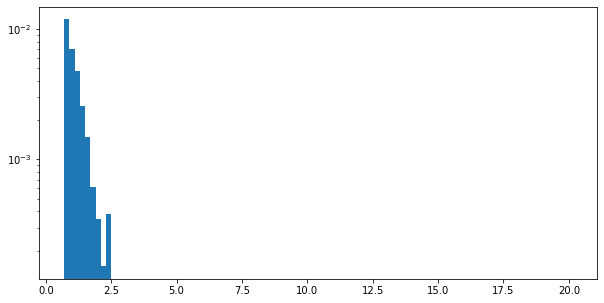

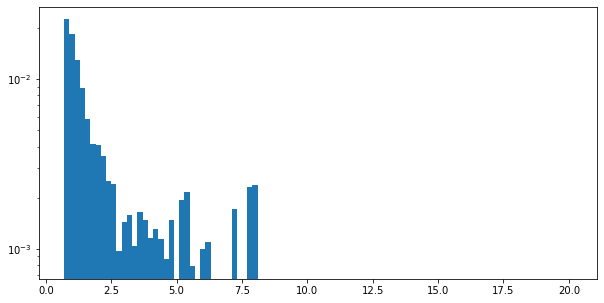

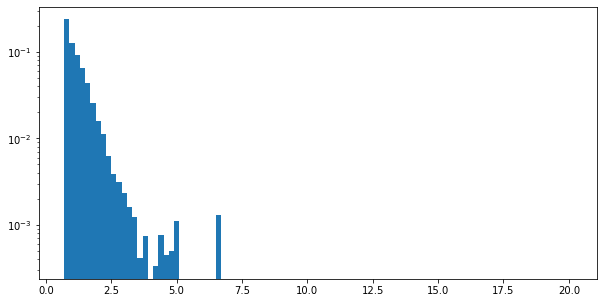

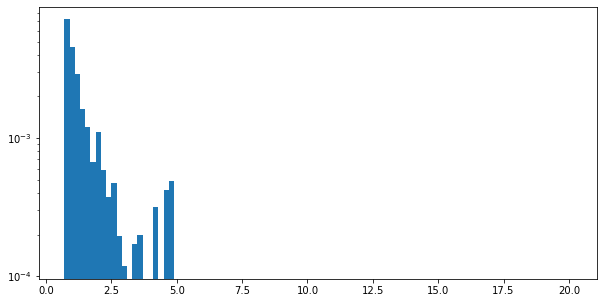

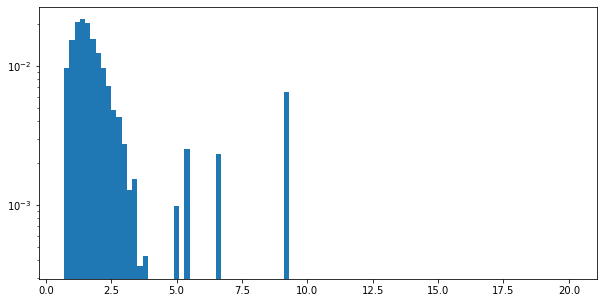

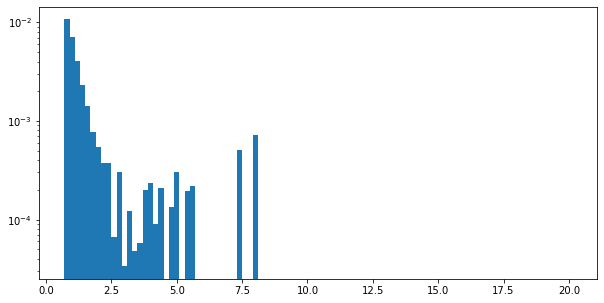

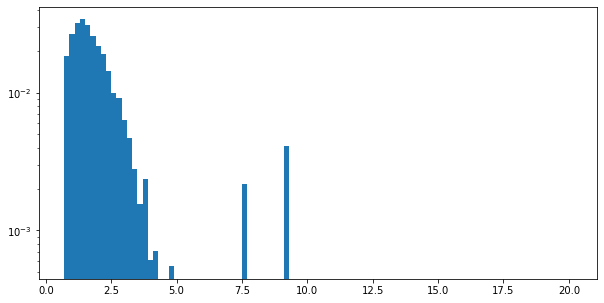

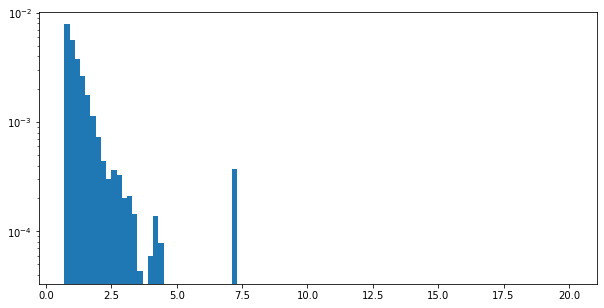

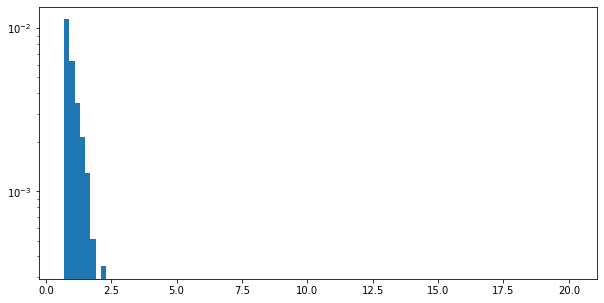

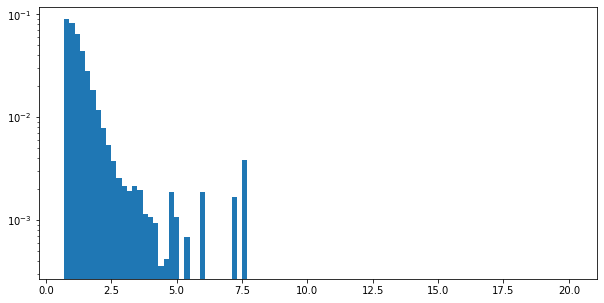

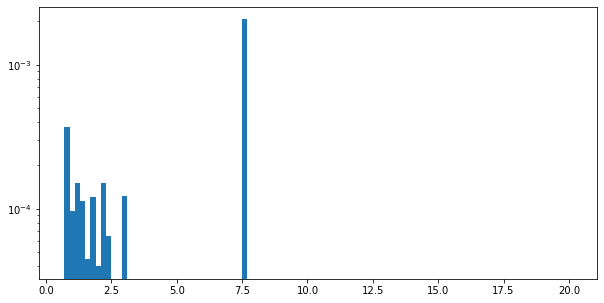

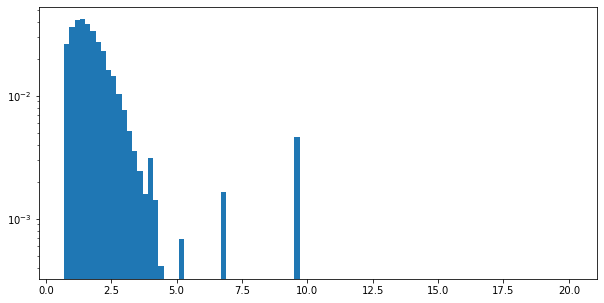

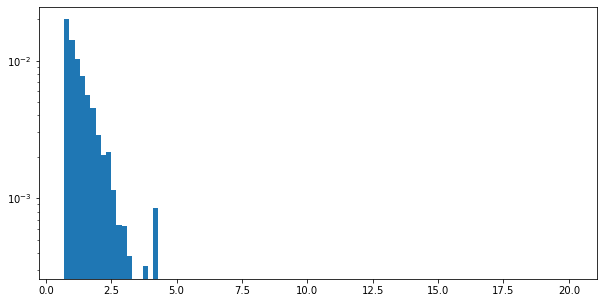

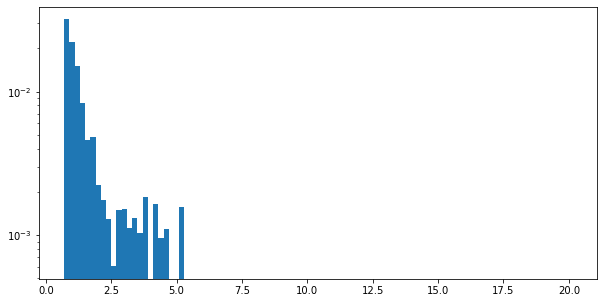

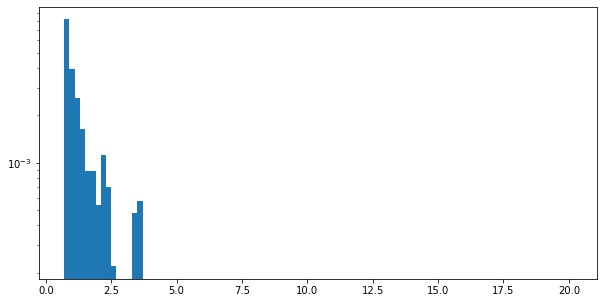

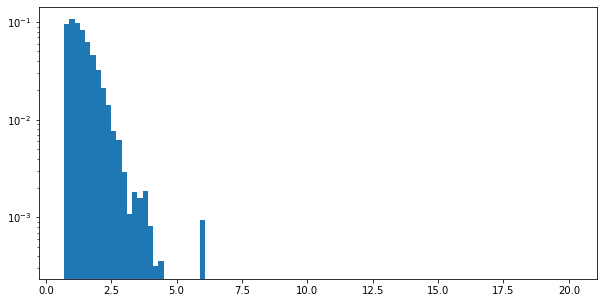

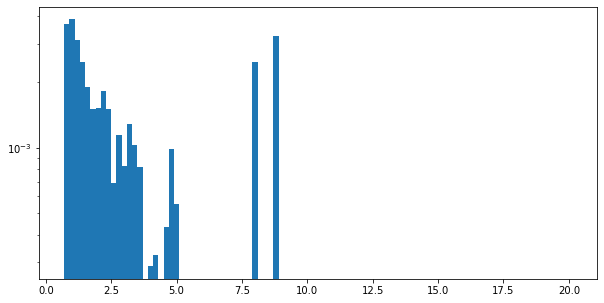

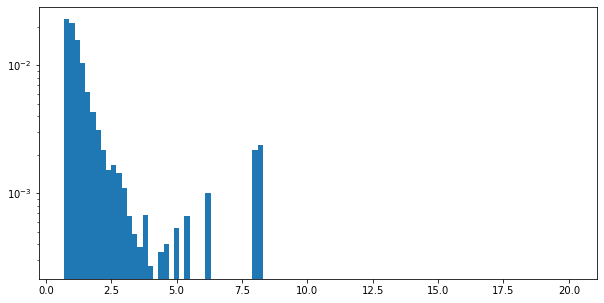

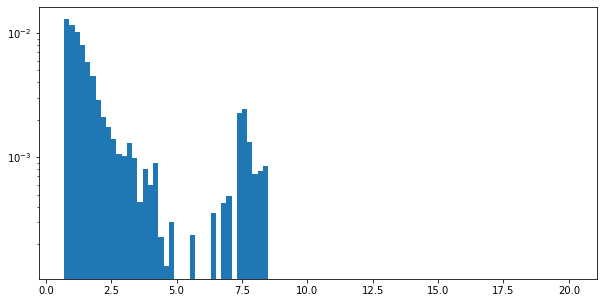

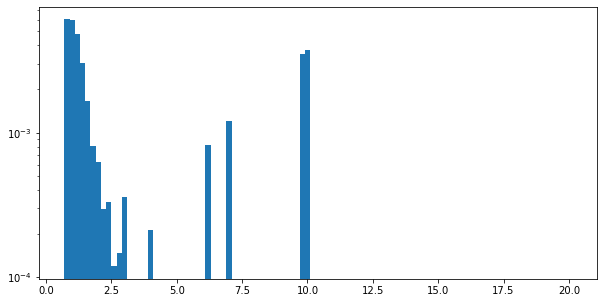

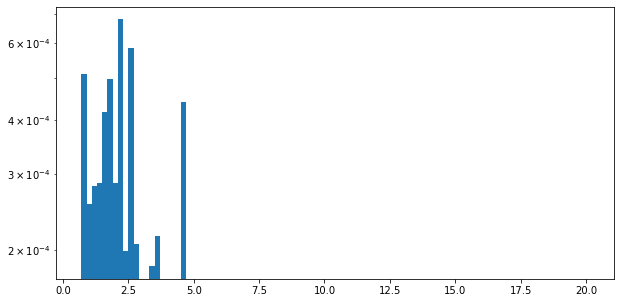

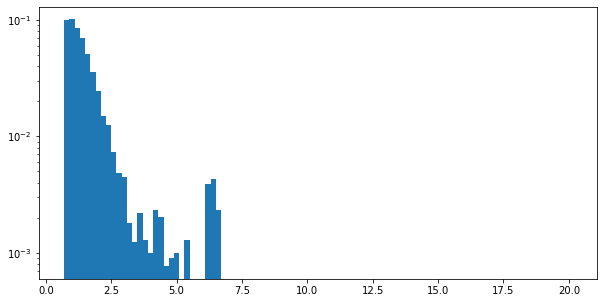

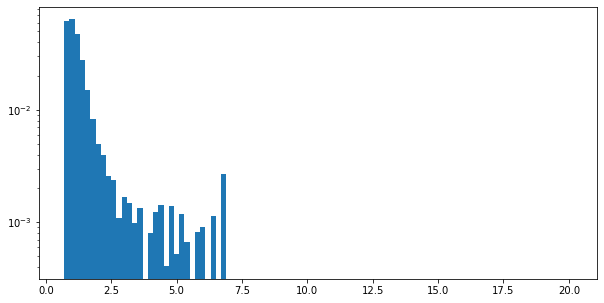

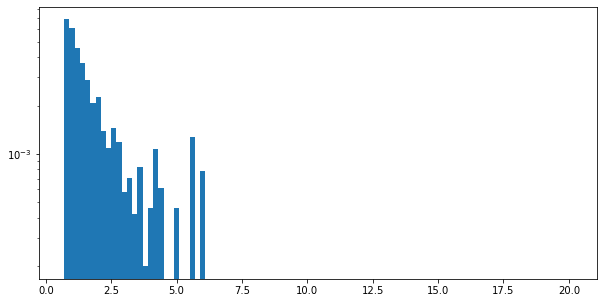

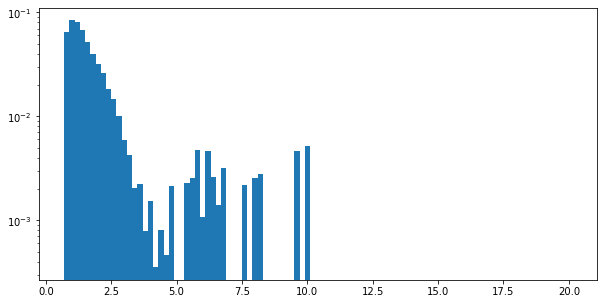

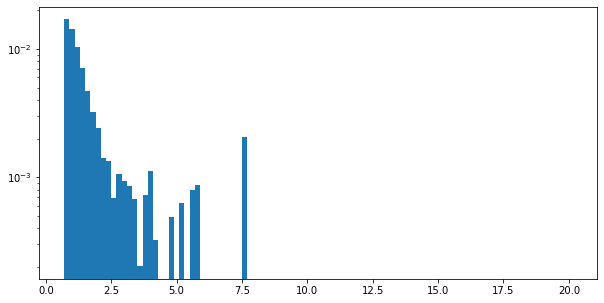

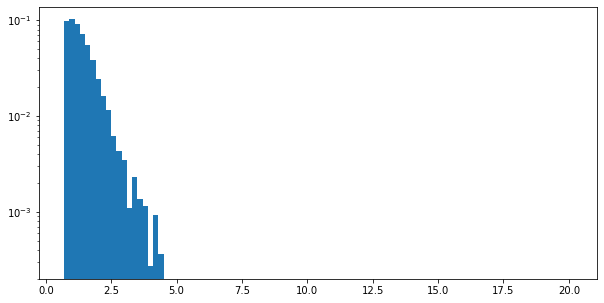

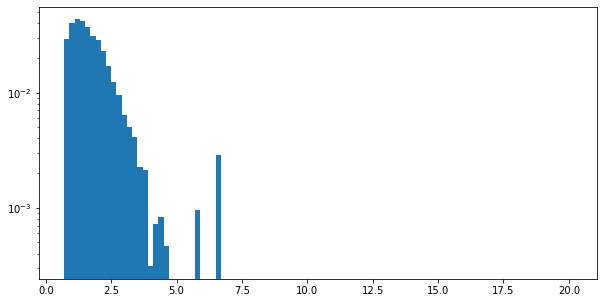

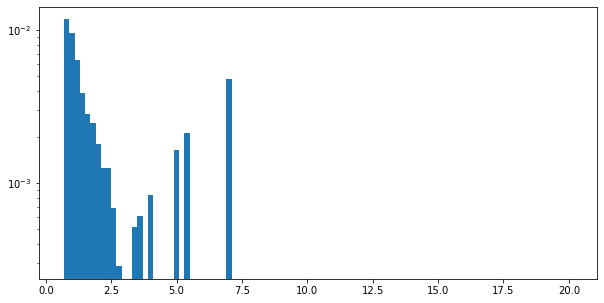

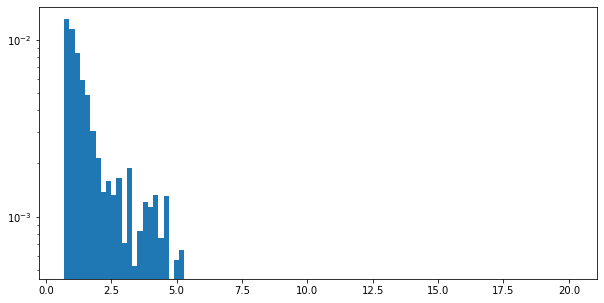

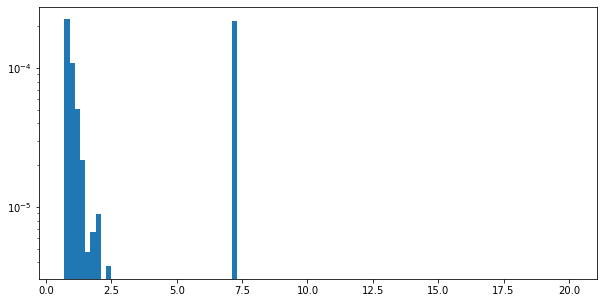

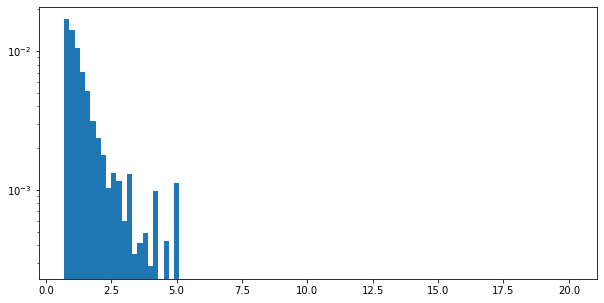

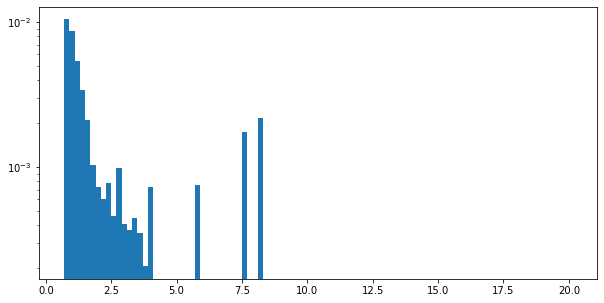

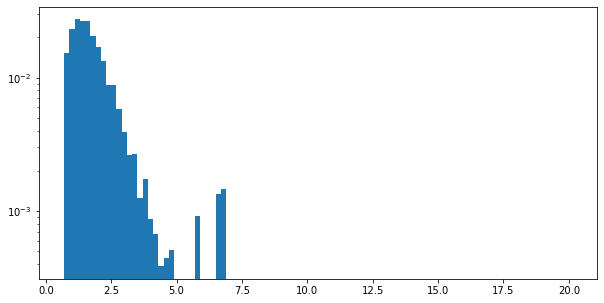

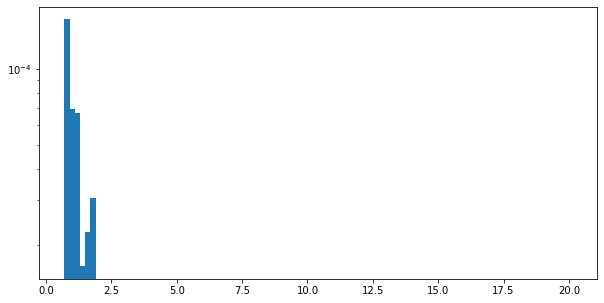

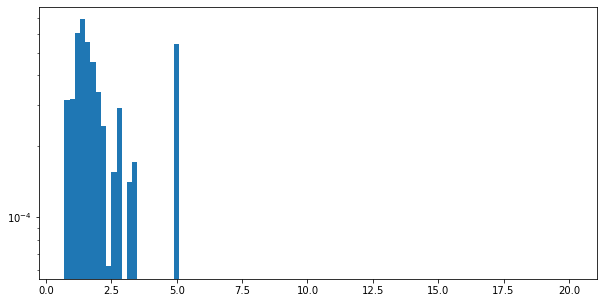

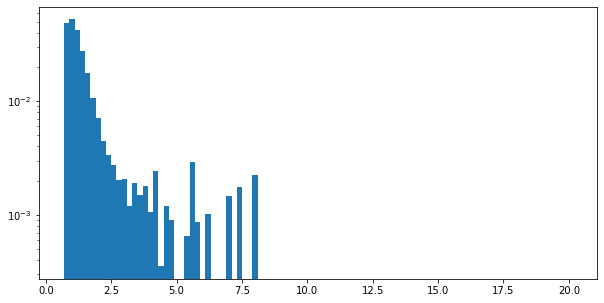

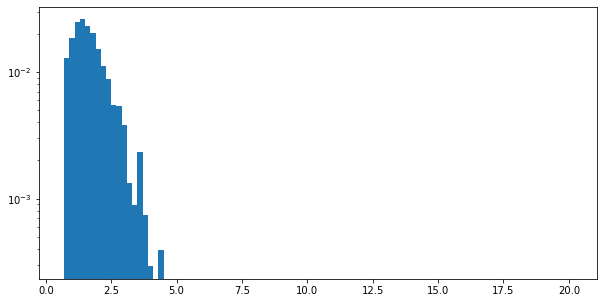

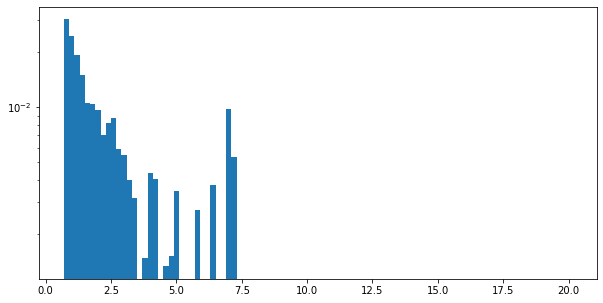

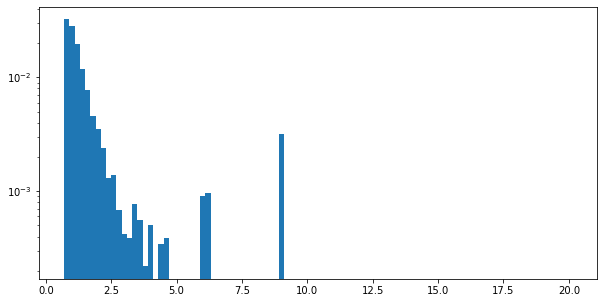

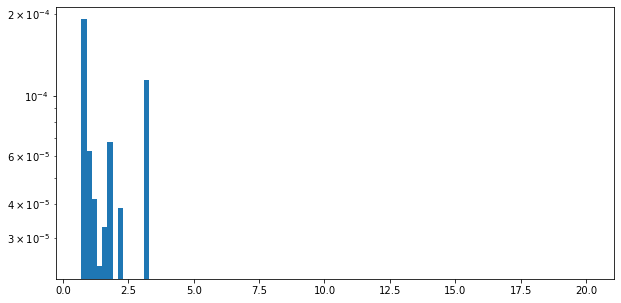

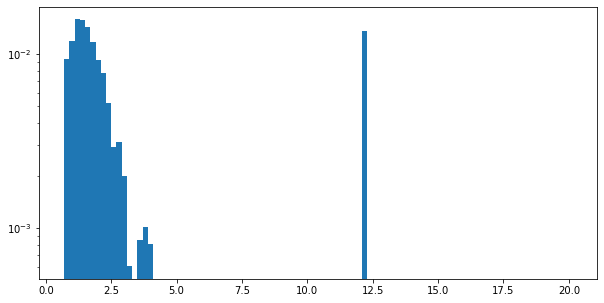

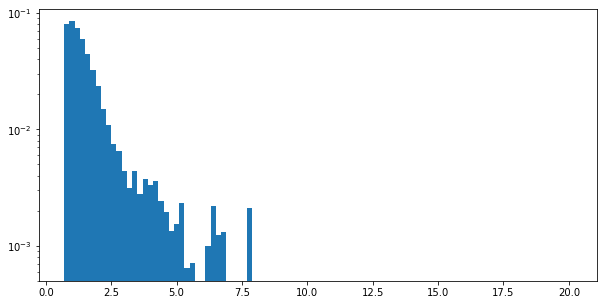

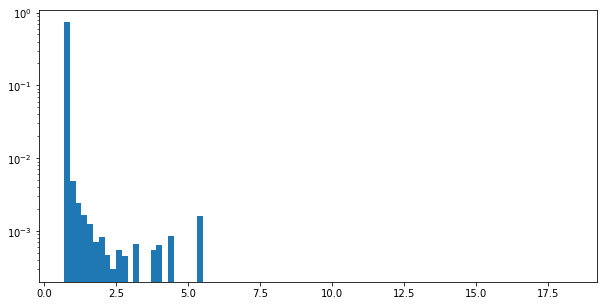

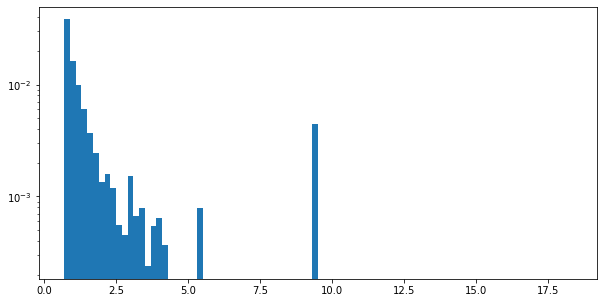

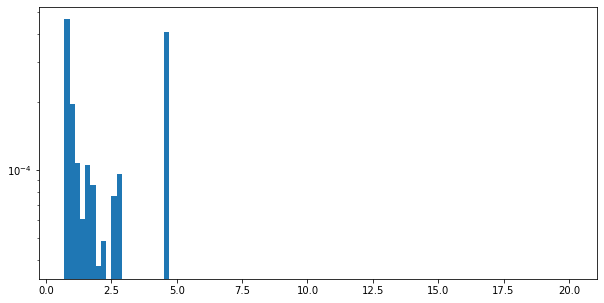

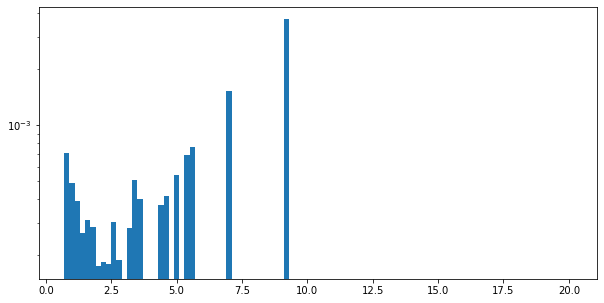

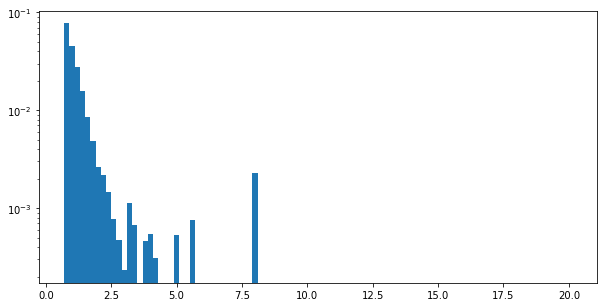

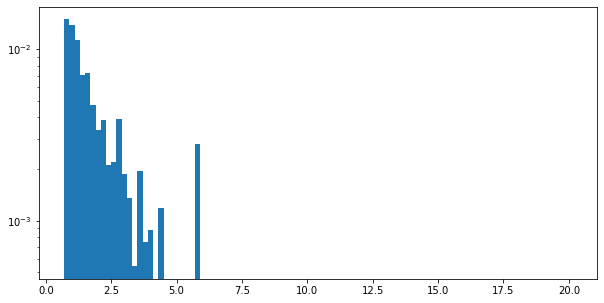

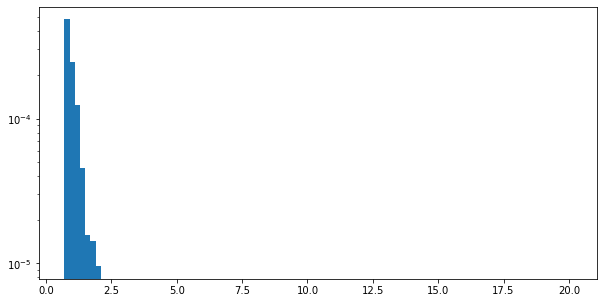

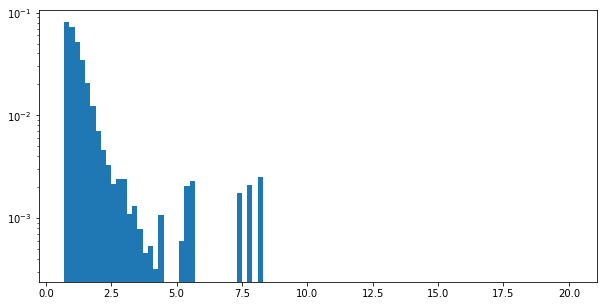

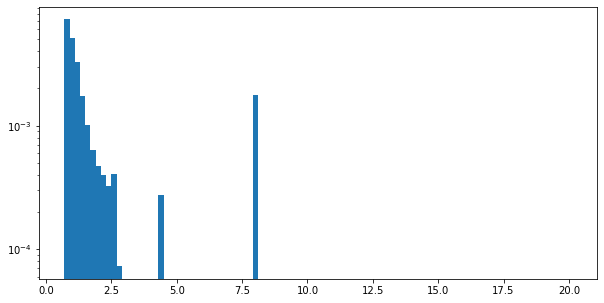

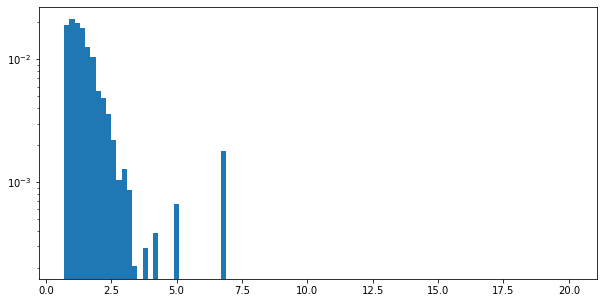

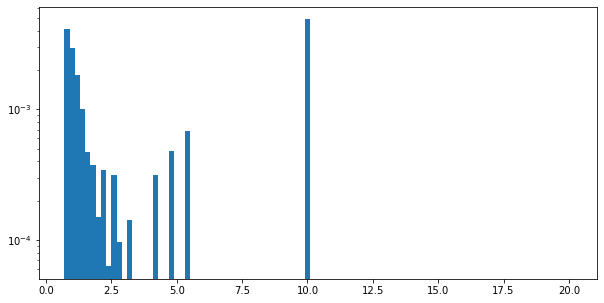

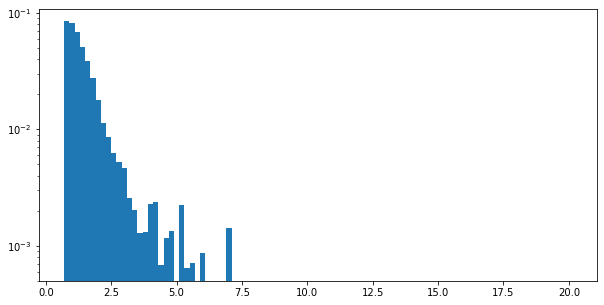

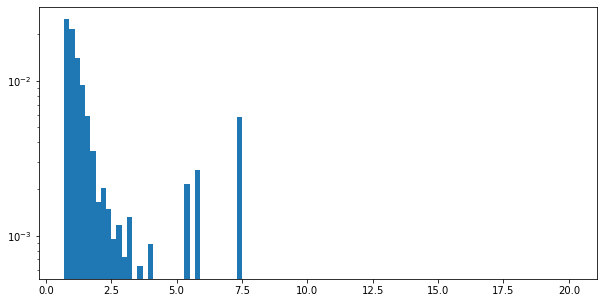

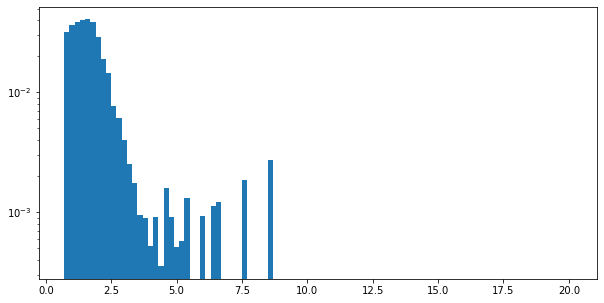

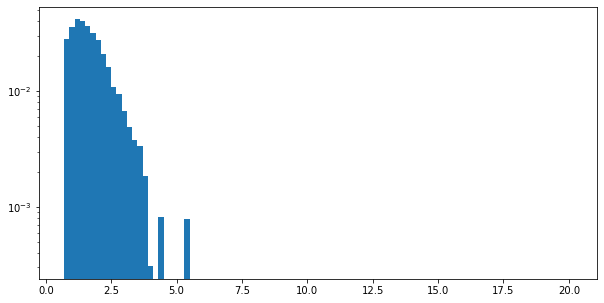

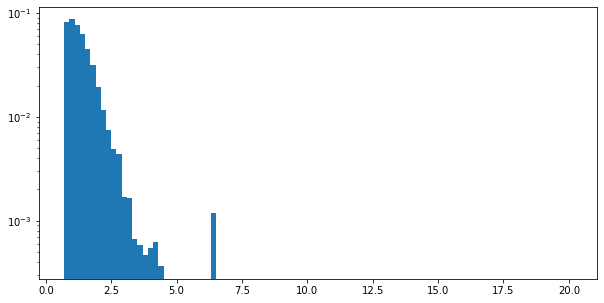

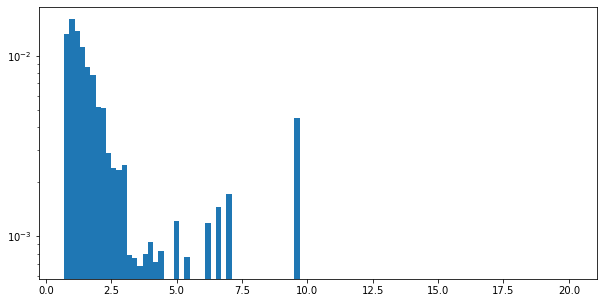

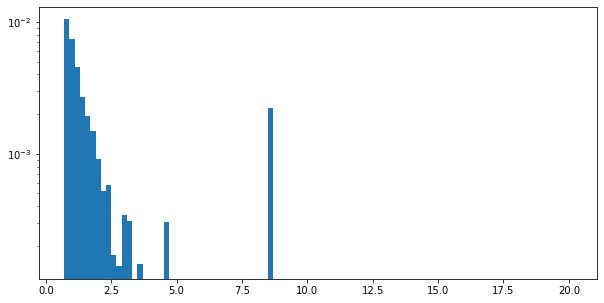

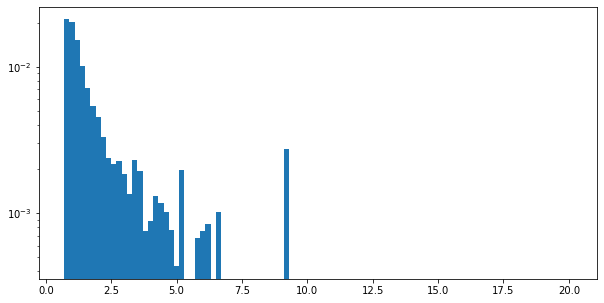

In [9]:
# plot all histograms separately, with a log-log axis



for df in histdict.values():
    fig = plt.figure(figsize=(10, 5))
    plt.yscale('log')
    plt.bar(df['Mid'], df['Mass'], width=0.2)
    plt.show()
    


In [ ]:
# average all bins and plot bar graph
# concatenate them
df_concat = pd.concat(histdict.values())

by_row_index = df_concat.groupby(df_concat.index)
df_means = by_row_index.mean()

print(df_means.head())

fig2 = plt.figure(figsize=(20, 10))
plt.yscale('log')

plt.bar(df_means['Mid'], df_means['Concentration'])
    
plt.show()



In [ ]:
# Import metadata
# clean the data


Meta = pd.read_csv('metadata_mass.csv', sep=',')
Meta.head()

In [ ]:
# plot mass with other values

Meta = Meta.rename(columns={'NaCl equivalent mass loading (microg/m**3)':'Mass', 
                            'Slide exposure average GPS altitude (m)':'Avg GPS alt',
                            'Slide exposure average pressure (hpa)':'Pressure', 
                            'Slide exposure average dewpoint temp. (C)':'Dewpoint',
                            'Slide exposure average longitude (deg.decimal)':'Lon',
                            'Slide exposure average latitude (deg.decimal)':'Lat'})

# mass vs altitude

fig3 = plt.figure(figsize=(20, 10))

plt.plot(Meta['Avg GPS alt'], Meta['Mass'], 'o')
    
plt.show()




In [ ]:
# lat lon, mass heat map

fig4 = plt.figure(figsize=(20, 10))

plt.plot(Meta['Lat'], Meta['Mass'], 'o')
    
plt.show()

fig5 = plt.figure(figsize=(20, 10))

plt.plot(Meta['Lon'], Meta['Mass'], 'o')
    
plt.show()

In [ ]:
# dewpoint temp

fig6 = plt.figure(figsize=(20, 10))

plt.plot(Meta['Dewpoint'], Meta['Mass'], 'o')
    
plt.show()

In [ ]:
fig7 = plt.figure(figsize=(20, 10))

plt.plot(Meta['Avg GPS alt'], Meta['Dewpoint'], 'o')
    
plt.show()